In [ ]:
#In this method capping is called as Winsorization

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Density'>

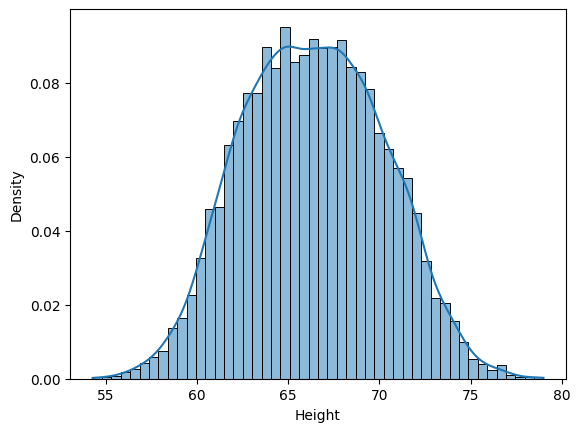

In [10]:
sns.histplot(df['Height'],kde=True,stat='density',fill=True)

<Axes: xlabel='Height'>

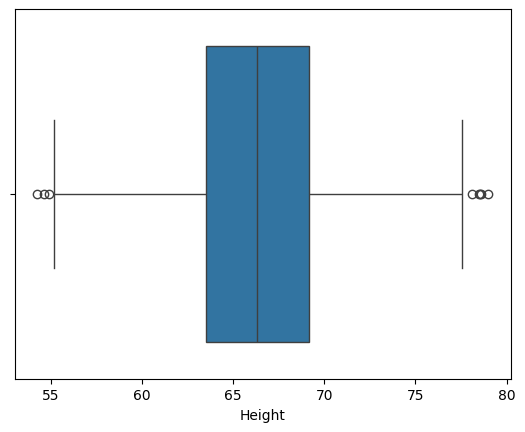

In [16]:
sns.boxplot(x=df['Height'])

In [17]:
upper_limit=df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [18]:
lower_limit=df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [19]:
df[(df['Height']>=upper_limit) | (df['Height']<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [21]:
new_df=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]

In [22]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [23]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [24]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

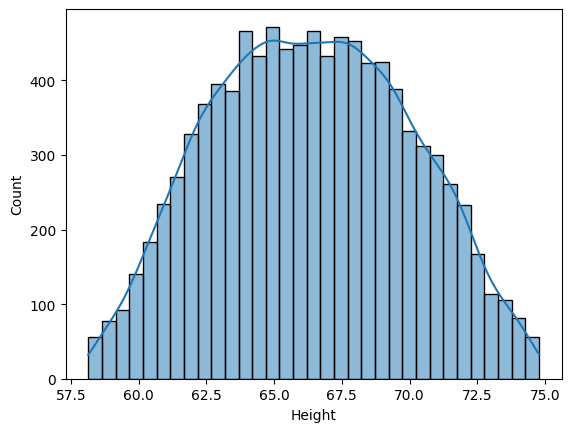

In [26]:
sns.histplot(new_df['Height'],kde=True)

<Axes: xlabel='Height'>

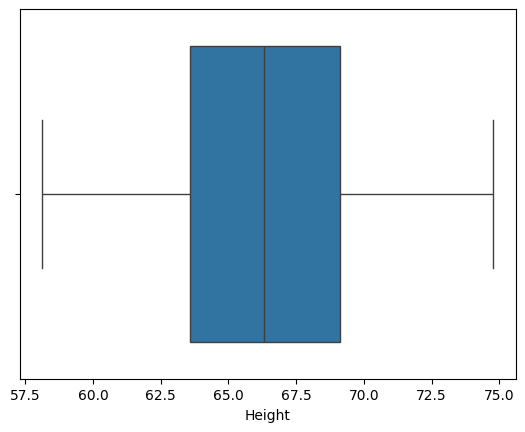

In [29]:
sns.boxplot(x=new_df['Height'])

In [31]:
#capping or Winsorization
df['Height']=np.where(
    df['Height']>=upper_limit,
    upper_limit,
    np.where(
        df['Height']<=lower_limit,
        lower_limit,
        df['Height']
    )
        )

In [33]:
df.shape

(10000, 3)

In [34]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

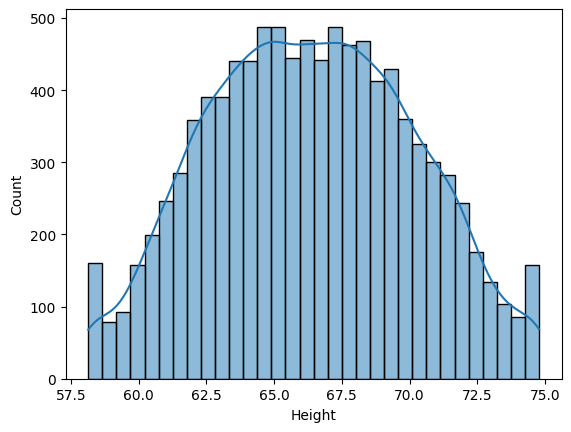

In [35]:
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Height'>

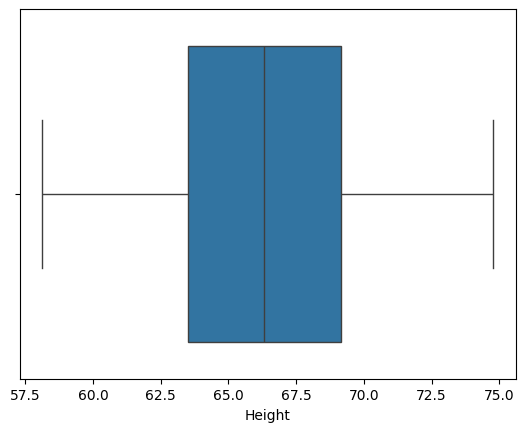

In [37]:
sns.boxplot(x=df['Height'])